In [89]:
from torchvision import transforms
import random
import torch


class GaussianNoise(torch.nn.Module):
    """Adds guassian noise to images."""

    def __init__(self, min_var: float = 0.01, max_var: float = 0.1):
        super().__init__()
        self.min_var = min_var
        self.max_var = max_var

    def __call__(self, tensor):

        var = random.uniform(self.min_var, self.max_var)
        noisy = tensor + torch.randn(tensor.size()) * var
        noisy = torch.clamp(noisy, min=0., max=1.)
        return noisy

    def __repr__(self):
        return self.__class__.__name__ + f"(min_var={self.min_var}, max_var={self.max_var})"
    

def get_dynamic_augs(rand_prob=1.0, strength=1.0):
    """Strong augmentations for OpenSRH training"""
    # Initialize list of transformations
    strong_aug = []

    # Append transformations to the list
    strong_aug.append(transforms.ToTensor())
    # strong_aug.append(transforms.RandomHorizontalFlip(p=rand_prob))
    # print(f"RandomHorizontalFlip with probability {rand_prob}")
    # 
    # strong_aug.append(transforms.RandomVerticalFlip(p=rand_prob))
    # print(f"RandomVerticalFlip with probability {rand_prob}")
    # strong_aug.append(transforms.RandomApply(
    #     [transforms.ColorJitter(0.4 * strength, 0.4 * strength, 0.4 * strength, 0.1 * strength)], p=rand_prob))
    # print(f"ColorJitter with brightness: {0.4 * strength}, contrast: {0.4 * strength}, saturation: {0.4 * strength}, hue: {0.1 * strength}, RandomApply with probability {rand_prob}")
    # strong_aug.append(transforms.RandomAutocontrast(p=rand_prob))
    # print(f"RandomAutocontrast with probability {rand_prob}")
    # strong_aug.append(transforms.RandomAdjustSharpness(sharpness_factor=12.0 * strength, p=rand_prob))
    # print(f"RandomAdjustSharpness with sharpness_factor: {12.0 * strength}, with probability {rand_prob}")
    
    strong_aug.append(transforms.RandomApply([GaussianNoise(min_var=0.1 * strength, max_var=0.1 * strength)], p=rand_prob))
    print(f"GaussianNoise with min_var: {0.01 * strength}, max_var: {0.1 * strength}, RandomApply with probability {rand_prob}")

    
    # strong_aug.append(transforms.RandomSolarize(threshold=0.2 + 0.8*(1 - strength), p=rand_prob))
    # print(f"Solarize threshold: {0.2 + 0.8*(1 - strength)}")
    # strong_aug.append( transforms.RandomApply([transforms.GaussianBlur(kernel_size=(5,5), sigma=(1.0 * strength, 1.0 * strength))], p=rand_prob))
    # print(f"Gaussian blur sigma: {1.0 * strength}, {1.0 * strength}, RandomApply with probability {rand_prob}")
    # 
    # strong_aug.append(transforms.RandomApply(
    #     [transforms.RandomAffine(degrees=(-10.0 * strength, 10.0 * strength),
    #                              translate=(0.1 * strength, 0.3 * strength))], p=rand_prob))
    # print(f"RandomAffine with probability {rand_prob}, Affine degrees: {-10.0 * strength}, {10.0 * strength}, Affine translate: {0.1 * strength}, {0.3 * strength}")
    # strong_aug.append(transforms.RandomErasing(p=rand_prob, scale=(0.02 * strength, 0.33 * strength),
    #                                            ratio=(0.3, 3.3), value=0, inplace=False))
    # print(f"RandomErasing with probability {rand_prob}, Erasing scale: {0.02 * strength}, {0.33 * strength}, Erasing ratio: {0.3 * strength}, {3.3 * strength}")
    # strong_aug.append(transforms.RandomResizedCrop(size=(300, 300), scale=(1 - strength*0.92, 1.0), ratio=(0.75, 1.333)))
    # print(f"RandomResizedCrop with size: 300, 300, scale: {1 - strength*0.92}, {1.0}, ratio: 0.75, 1.333, RandomApply with probability {rand_prob}")
    
    # rescale the image to 300x300
    strong_aug.append(transforms.Resize((300, 300)))
    
    return transforms.Compose(strong_aug)

EPOCH: 50, Strength: 0.95
GaussianNoise with min_var: 0.0095, max_var: 0.095, RandomApply with probability 1.0
Range of tf_image: 0.0, 1.0
Shape of tf_image: torch.Size([3, 300, 300])


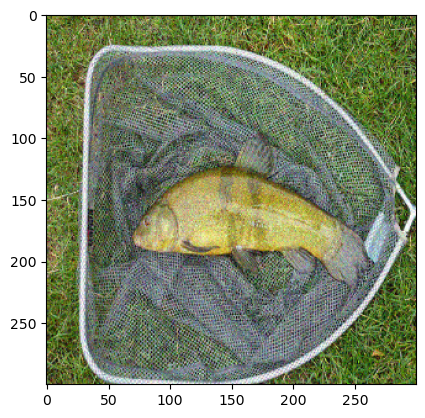

EPOCH: 100, Strength: 0.9
GaussianNoise with min_var: 0.009000000000000001, max_var: 0.09000000000000001, RandomApply with probability 1.0
Range of tf_image: 0.0, 1.0
Shape of tf_image: torch.Size([3, 300, 300])


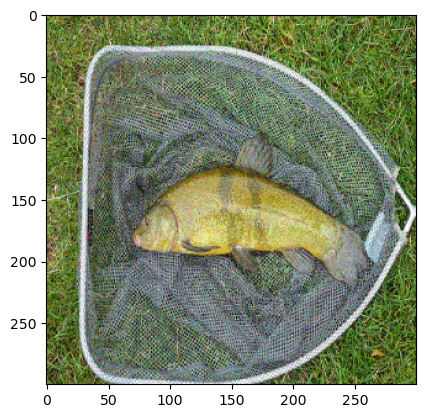

EPOCH: 150, Strength: 0.85
GaussianNoise with min_var: 0.0085, max_var: 0.085, RandomApply with probability 1.0
Range of tf_image: 0.0, 1.0
Shape of tf_image: torch.Size([3, 300, 300])


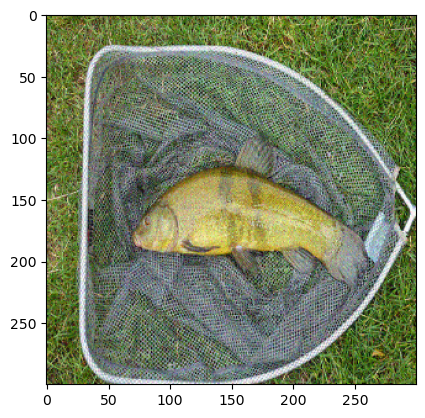

EPOCH: 200, Strength: 0.8
GaussianNoise with min_var: 0.008, max_var: 0.08000000000000002, RandomApply with probability 1.0
Range of tf_image: 0.0, 1.0
Shape of tf_image: torch.Size([3, 300, 300])


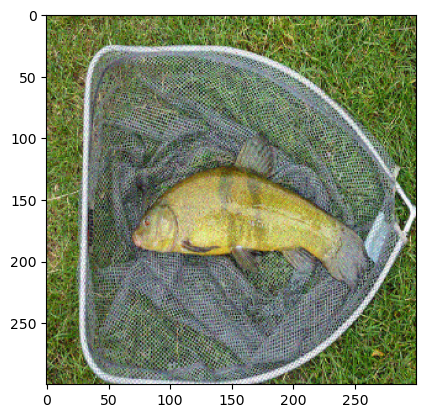

EPOCH: 250, Strength: 0.75
GaussianNoise with min_var: 0.0075, max_var: 0.07500000000000001, RandomApply with probability 1.0
Range of tf_image: 0.0, 1.0
Shape of tf_image: torch.Size([3, 300, 300])


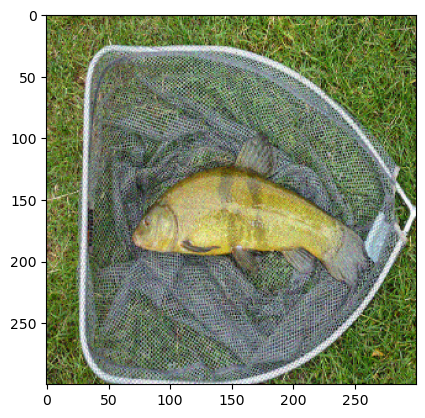

EPOCH: 300, Strength: 0.7
GaussianNoise with min_var: 0.006999999999999999, max_var: 0.06999999999999999, RandomApply with probability 1.0
Range of tf_image: 0.0, 1.0
Shape of tf_image: torch.Size([3, 300, 300])


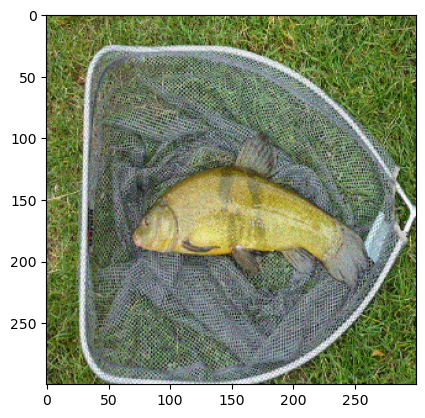

EPOCH: 350, Strength: 0.65
GaussianNoise with min_var: 0.006500000000000001, max_var: 0.065, RandomApply with probability 1.0
Range of tf_image: 0.0, 1.0
Shape of tf_image: torch.Size([3, 300, 300])


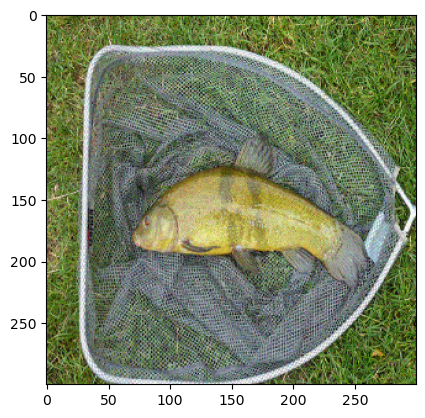

EPOCH: 400, Strength: 0.6
GaussianNoise with min_var: 0.006, max_var: 0.06, RandomApply with probability 1.0
Range of tf_image: 0.0, 1.0
Shape of tf_image: torch.Size([3, 300, 300])


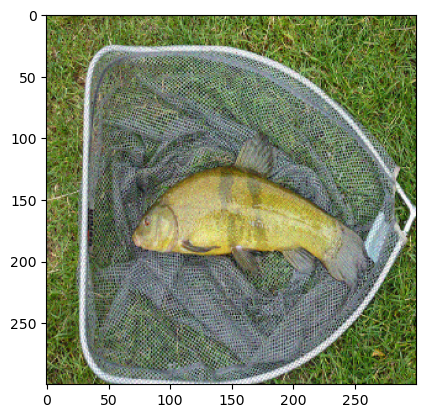

EPOCH: 450, Strength: 0.55
GaussianNoise with min_var: 0.0055000000000000005, max_var: 0.05500000000000001, RandomApply with probability 1.0
Range of tf_image: 0.0, 1.0
Shape of tf_image: torch.Size([3, 300, 300])


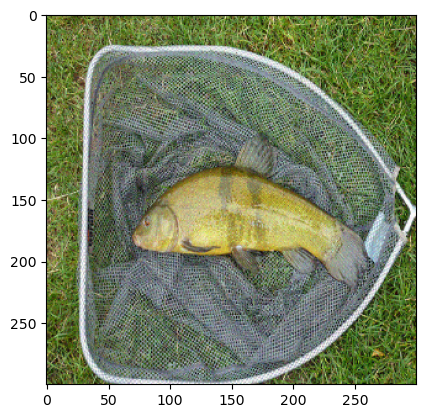

EPOCH: 500, Strength: 0.5
GaussianNoise with min_var: 0.005, max_var: 0.05, RandomApply with probability 1.0
Range of tf_image: 0.0, 1.0
Shape of tf_image: torch.Size([3, 300, 300])


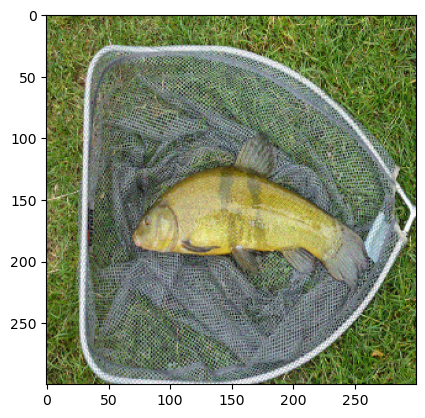

EPOCH: 550, Strength: 0.44999999999999996
GaussianNoise with min_var: 0.0045, max_var: 0.045, RandomApply with probability 1.0
Range of tf_image: 0.0, 1.0
Shape of tf_image: torch.Size([3, 300, 300])


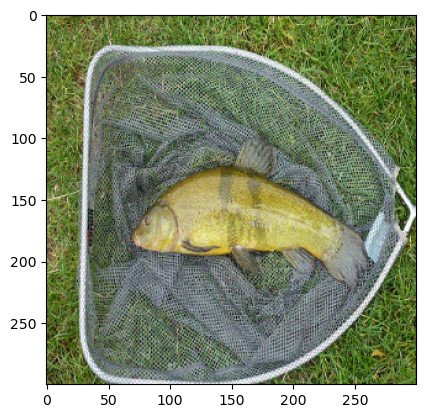

EPOCH: 600, Strength: 0.4
GaussianNoise with min_var: 0.004, max_var: 0.04000000000000001, RandomApply with probability 1.0
Range of tf_image: 0.0, 1.0
Shape of tf_image: torch.Size([3, 300, 300])


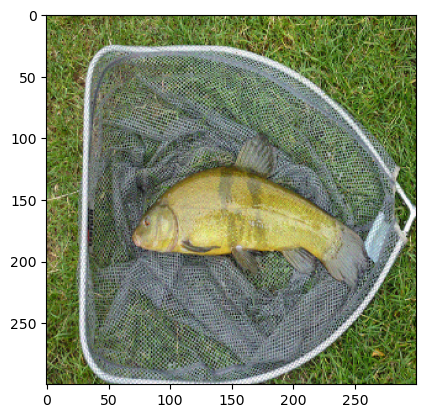

EPOCH: 650, Strength: 0.35
GaussianNoise with min_var: 0.0034999999999999996, max_var: 0.034999999999999996, RandomApply with probability 1.0
Range of tf_image: 0.0, 1.0
Shape of tf_image: torch.Size([3, 300, 300])


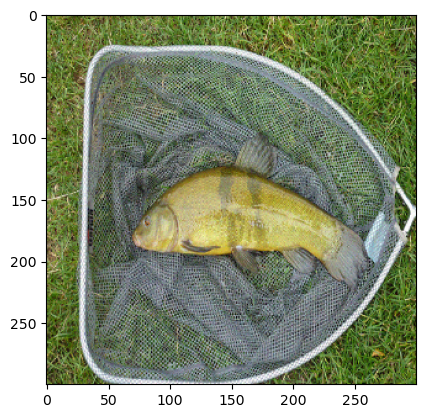

EPOCH: 700, Strength: 0.30000000000000004
GaussianNoise with min_var: 0.0030000000000000005, max_var: 0.030000000000000006, RandomApply with probability 1.0
Range of tf_image: 0.0, 1.0
Shape of tf_image: torch.Size([3, 300, 300])


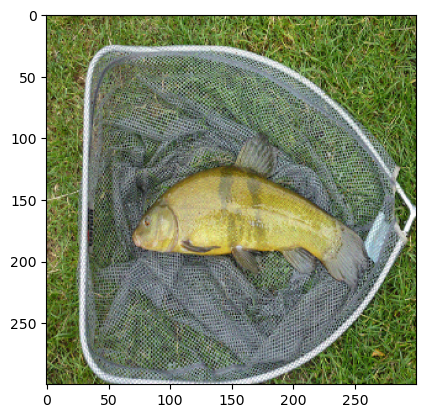

EPOCH: 750, Strength: 0.25
GaussianNoise with min_var: 0.0025, max_var: 0.025, RandomApply with probability 1.0
Range of tf_image: 0.0, 1.0
Shape of tf_image: torch.Size([3, 300, 300])


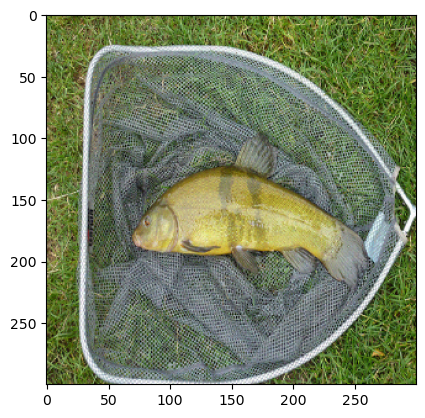

EPOCH: 800, Strength: 0.19999999999999996
GaussianNoise with min_var: 0.0019999999999999996, max_var: 0.019999999999999997, RandomApply with probability 1.0
Range of tf_image: 0.0, 1.0
Shape of tf_image: torch.Size([3, 300, 300])


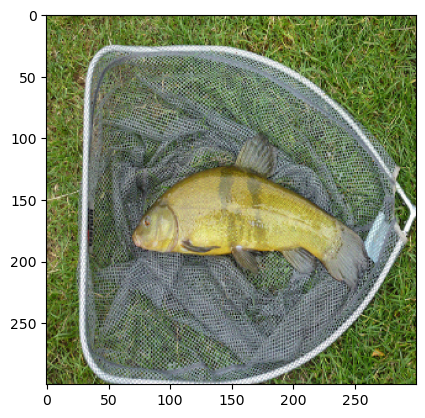

EPOCH: 850, Strength: 0.15000000000000002
GaussianNoise with min_var: 0.0015000000000000002, max_var: 0.015000000000000003, RandomApply with probability 1.0
Range of tf_image: 0.0, 1.0
Shape of tf_image: torch.Size([3, 300, 300])


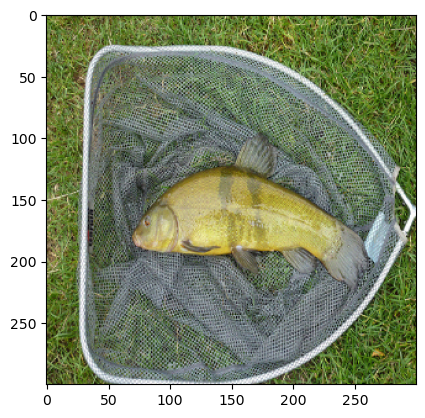

EPOCH: 900, Strength: 0.09999999999999998
GaussianNoise with min_var: 0.0009999999999999998, max_var: 0.009999999999999998, RandomApply with probability 1.0
Range of tf_image: 0.0, 1.0
Shape of tf_image: torch.Size([3, 300, 300])


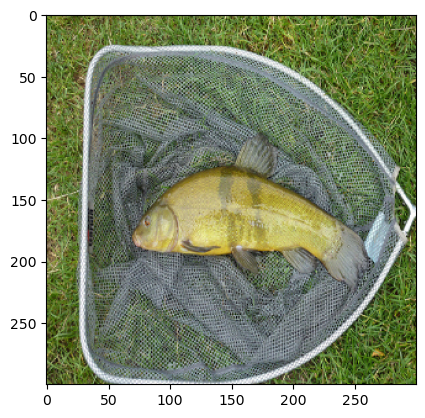

EPOCH: 950, Strength: 0.050000000000000044
GaussianNoise with min_var: 0.0005000000000000004, max_var: 0.0050000000000000044, RandomApply with probability 1.0
Range of tf_image: 0.0, 1.0
Shape of tf_image: torch.Size([3, 300, 300])


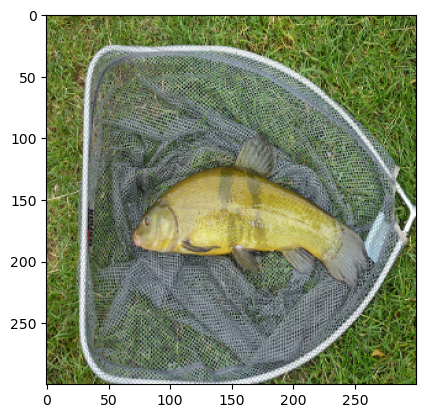

Count: 19


In [90]:
# load an image using PIL, then apply the transforms with the dynamic augs of varying strength and display them
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open(r"F:\Code\datasets\ImageNet\val\n01440764\ILSVRC2012_val_00007197.JPEG")

    
epochs = 1000
K = 50

strength = 1.0

count = 0
break_count = 20
for epoch in range(epochs):
    
    before_strength = strength
    strength = 1.0 - int((epoch/K)) * K / epochs
    
    if before_strength != strength:
        count += 1
        print(f"EPOCH: {epoch}, Strength: {strength}")
        tf_image = get_dynamic_augs(strength=strength, rand_prob=1.0)(image)
        print(f"Range of tf_image: {tf_image.min()}, {tf_image.max()}")
        print(f"Shape of tf_image: {tf_image.shape}")
        plt.imshow(tf_image.permute(1, 2, 0))
        plt.show()
        
    if count == break_count:
        break

print(f"Count: {count}")
    
    